In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/BDDA_Project"

In [4]:
os.chdir(path)
os.listdir()

['CyberAttack.csv']

Dataset: https://www.kaggle.com/datasets/slashtea/kdd-cyberattack

In [5]:
# Install recent version of sklearn for
#     visualizing pipelines

!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###***Call Libraries***

In [6]:
# 1.0 Reset memory
#%reset -f
# 1.1 Call libraries

## A. Data manipulation
import numpy as np
import pandas as pd

# 1.2 for data splitting
from sklearn.model_selection import train_test_split

## B. Transformers for predictors:

# 1.3 Class for imputing missing values
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# 1.4 One hot encode categorical data--Convert to dummy
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder 

# 1.5 Scale numeric data
from sklearn.preprocessing import StandardScaler

## C. Transformer for target:

# 1.6 Label encode target column
from sklearn.preprocessing import LabelEncoder

## D. Composite Transformers:

# 1.7 Class for applying multiple data transformation
#     jobs parallely
from sklearn.compose import ColumnTransformer

# 1.8 Pipeline class: Class for applying multiple
#     data transformations sequentially
from sklearn.pipeline import Pipeline

## E. Estimator

# 1.9 Estimator
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# User guide: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier 

# 1.10 To plot graphs and pipeline diagram
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import set_config

In [7]:
# 1.11 Display outputs of all commands from a cell--not just of the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
# 2.0 Import warnings module
#     No FutureWarnings display
 
import warnings
# 2.1 Do not print warnings on screen
warnings.filterwarnings("ignore")

### Read and preprocess data

In [9]:
df=pd.read_csv('CyberAttack.csv')

In [10]:
df.head() 

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.2,0.22,0.11.1,0.23,0.24,0.25,0.26,0.27,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [11]:
#no columns in our dataset so we need to create ones for ourselves and read back the data. 
columns = ["Duration", "Protocoltype", "Service", "Flag", "Srcbytes", "Dstbytes", "Land", "Wrongfragment",
           "Urgent", "Hot", "Numfailedlogins", "Loggedin", "Numcompromised", "Rootshell", "Suattempted",
           "Numroot", "Numfilecreations", "Numshells", "Numaccessfiles", "Numoutboundcmds", "Ishostlogin",
           "Isguestlogin", "Count", "Srvcount", "serrorrate", "Srvserrorrate", "Rerrorrate", "Srvrerrorrate",
           "Samesrvrate", "Diffsrvrate", "Srvdiffhostrate", "Dsthostcount", "Dsthostsrvcount",
           "Dsthostsamesrvrate", "Dsthostdiffsrvrate", "Dsthostsamesrcportrate", "Dsthostsrvdiffhostrate",
           "Dsthostserrorrate", "Dsthostsrvserrorrate", "Dsthostrerrorrate", "Dsthostsrvrerror_rate","Labels"]
df=pd.read_csv('CyberAttack.csv',delimiter=',', header=None, skiprows=1,names=columns)

In [12]:
df.head()

,Duration,Protocoltype,Service,Flag,Srcbytes,Dstbytes,Land,Wrongfragment,Urgent,Hot,...,Dsthostsrvcount,Dsthostsamesrvrate,Dsthostdiffsrvrate,Dsthostsamesrcportrate,Dsthostsrvdiffhostrate,Dsthostserrorrate,Dsthostsrvserrorrate,Dsthostrerrorrate,Dsthostsrvrerror_rate,Labels
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [13]:
df.tail()

,Duration,Protocoltype,Service,Flag,Srcbytes,Dstbytes,Land,Wrongfragment,Urgent,Hot,...,Dsthostsrvcount,Dsthostsamesrvrate,Dsthostdiffsrvrate,Dsthostsamesrcportrate,Dsthostsrvdiffhostrate,Dsthostserrorrate,Dsthostsrvserrorrate,Dsthostrerrorrate,Dsthostsrvrerror_rate,Labels
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.


In [14]:
df.shape

(494020, 42)

In [15]:
df.dtypes

Duration                    int64
Protocoltype               object
Service                    object
Flag                       object
Srcbytes                    int64
Dstbytes                    int64
Land                        int64
Wrongfragment               int64
Urgent                      int64
Hot                         int64
Numfailedlogins             int64
Loggedin                    int64
Numcompromised              int64
Rootshell                   int64
Suattempted                 int64
Numroot                     int64
Numfilecreations            int64
Numshells                   int64
Numaccessfiles              int64
Numoutboundcmds             int64
Ishostlogin                 int64
Isguestlogin                int64
Count                       int64
Srvcount                    int64
serrorrate                float64
Srvserrorrate             float64
Rerrorrate                float64
Srvrerrorrate             float64
Samesrvrate               float64
Diffsrvrate   

In [16]:
df['Protocoltype'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [17]:
df['Labels'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [18]:
#Dropping unnecessary columns
df.drop(['Service','Flag','Land','Wrongfragment','Urgent','Hot','Loggedin','Numcompromised','Rootshell','Isguestlogin','Srvcount','serrorrate','Srvserrorrate'],axis=1,inplace=True)    

In [19]:
df.drop(['Samesrvrate','Diffsrvrate','Srvdiffhostrate','Dsthostcount','Dsthostsrvcount','Dsthostsamesrvrate','Dsthostdiffsrvrate','Dsthostsamesrcportrate','Dsthostsrvdiffhostrate','Dsthostserrorrate','Dsthostsrvserrorrate','Dsthostrerrorrate','Dsthostsrvrerror_rate'],axis=1,inplace=True)

###1. Initial data exploration and developing insights with data visualization

In [20]:
grouped_labels = df.groupby("Labels")["Labels"].count().sort_values(ascending=False)
grouped_labels

Labels
smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: Labels, dtype: int64

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 1.0, 'Count of attacks and normal events')

Text(0, 0.5, 'Count')

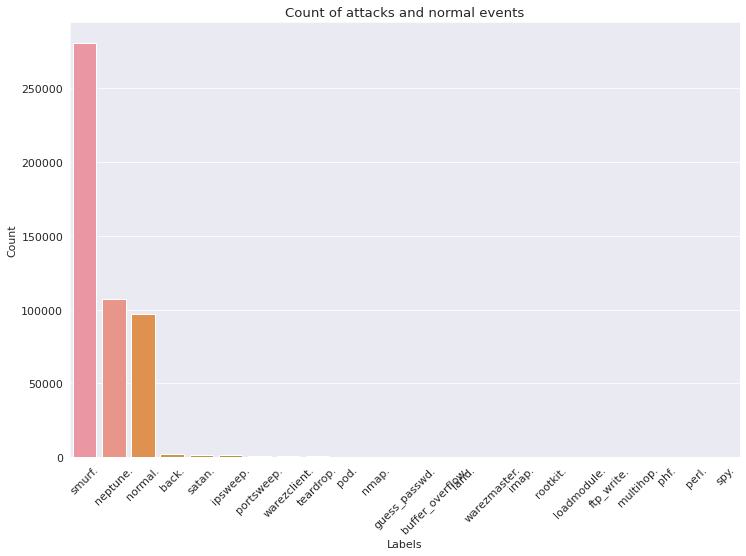

In [21]:
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12,8)
font = {"size"   : 11}
plt.rc('font', **font)

plt.xticks(rotation=45)

sns.barplot(x=grouped_labels.index, y=grouped_labels.values)
plt.title("Count of attacks and normal events")
plt.ylabel("Count")

In [22]:
grouped_labels1 = df.groupby("Protocoltype")["Protocoltype"].count().sort_values(ascending=False)
grouped_labels1

Protocoltype
icmp    283602
tcp     190064
udp      20354
Name: Protocoltype, dtype: int64

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 1.0, 'labels by Protocol type')

Text(0, 0.5, 'Count')

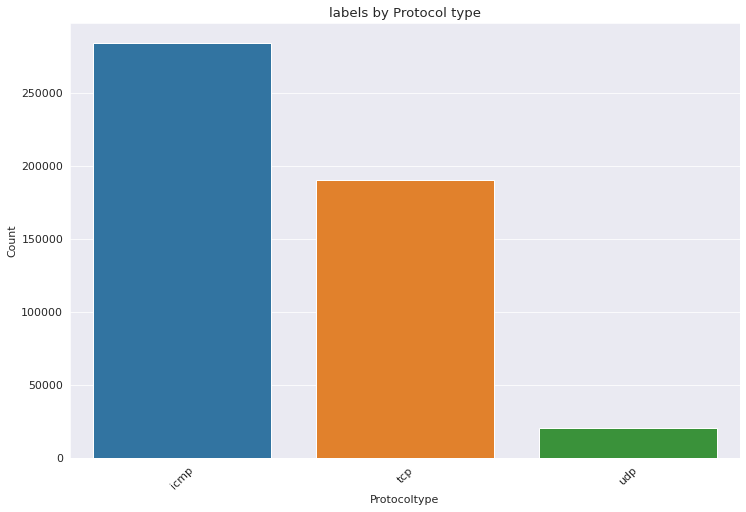

In [23]:
plt.xticks(rotation=45)
sns.barplot(x=grouped_labels1.index, y=grouped_labels1.values)
plt.title("labels by Protocol type")
plt.ylabel("Count")

There seems to a high number of maliscious events within the tcp and icmp protocols having a high number of past connections to the current host within the last 2 seconds. That's a column that already exists within the dataset.

In [24]:
df.dtypes

Duration              int64
Protocoltype         object
Srcbytes              int64
Dstbytes              int64
Numfailedlogins       int64
Suattempted           int64
Numroot               int64
Numfilecreations      int64
Numshells             int64
Numaccessfiles        int64
Numoutboundcmds       int64
Ishostlogin           int64
Count                 int64
Rerrorrate          float64
Srvrerrorrate       float64
Labels               object
dtype: object

Finding out number of unique values for each column

In [25]:
len(df['Duration'].unique())

2495

In [26]:
len(df['Srcbytes'].unique())

3300

In [27]:
len(df['Dstbytes'].unique())

10725

In [28]:
len(df['Numfailedlogins'].unique())

6

In [29]:
len(df['Suattempted'].unique())

3

In [30]:
df['Suattempted'].unique()

array([0, 1, 2])

In [31]:
len(df['Numroot'].unique())

20

In [32]:
len(df['Numfilecreations'].unique())

18

In [33]:
len(df['Numaccessfiles'].unique())

7

In [34]:
df['Numaccessfiles'].unique()

array([0, 1, 2, 4, 6, 3, 8])

In [35]:
len(df['Numoutboundcmds'].unique())

1

In [36]:
len(df['Ishostlogin'].unique())

1

In [37]:
len(df['Count'].unique())

490

In [38]:
len(df['Rerrorrate'].unique())

77

In [39]:
len(df['Srvrerrorrate'].unique())

51

In [40]:
len(df['Labels'].unique())

23

# 2. Feature engineering--creating new features

In [41]:
def remove_dot(Label):
    """ Remove dot from labels """
    return Label.replace(".", "")


df["Labels"] = df["Labels"].apply(lambda Label: remove_dot(Label))
print(pd.unique(df["Labels"]))

['normal' 'buffer_overflow' 'loadmodule' 'perl' 'neptune' 'smurf'
 'guess_passwd' 'pod' 'teardrop' 'portsweep' 'ipsweep' 'land' 'ftp_write'
 'back' 'imap' 'satan' 'phf' 'nmap' 'multihop' 'warezmaster' 'warezclient'
 'spy' 'rootkit']


In [42]:
#Mapping of different attacks to it's attack family
attack_families = {
    "back": "dos",
    "buffer_overflow": "u2r",
    "ftp_write": "r2l",
    "guess_passwd": "r2l",
    "imap": "r2l",
    "ipsweep": "probe",
    "land": "dos",
    "loadmodule": "u2r",
    "multihop": "r2l",
    "neptune": "dos",
    "nmap": "probe",
    "perl": "u2r",
    "phf": "r2l",
    "pod": "dos",
    "portsweep": "probe",
    "rootkit": "u2r",
    "satan": "probe",
    "smurf": "dos",
     "spy": "r2l",
    "teardrop": "dos",
    "warezclient": "r2l",
    "warezmaster": "r2l",
    "normal": "normal",
}    

In [43]:
def map_attacks_to_families(attack):
    """ Map attack to it's family """
    return attack_families[attack]


df["Labels"] = df["Labels"].apply(lambda attack: map_attacks_to_families(attack))
print(pd.unique(df["Labels"]))

['normal' 'u2r' 'dos' 'r2l' 'probe']


# More Data visualization

Text(0.5, 1.0, 'Number of connections to the same host as the current connection in the past two seconds ')

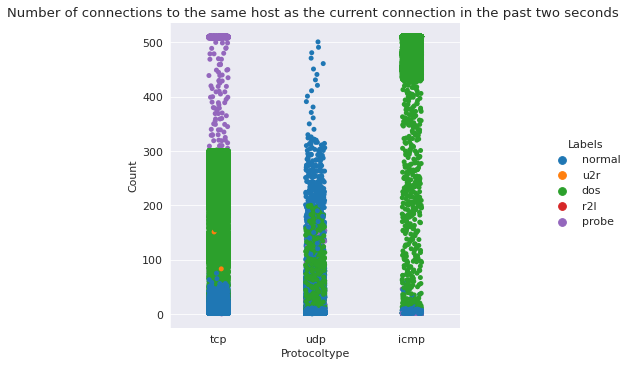

In [44]:
sns.catplot(x="Protocoltype", y="Count", hue="Labels", data=df)
plt.title("Number of connections to the same host as the current connection in the past two seconds ")

Text(0.5, 1.0, 'Class balance')

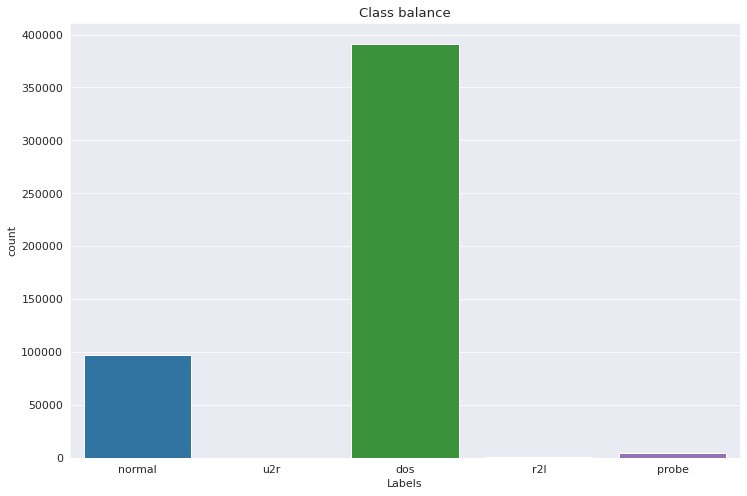

In [45]:
sns.countplot(x="Labels", data=df)
plt.title("Class balance")

Text(0.5, 1.0, 'Number of connections to the same host as the current connection in the past two seconds ')

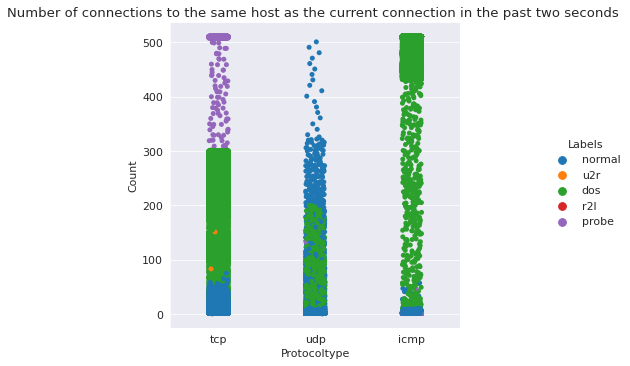

In [46]:
sns.catplot(x="Protocoltype", y="Count", hue="Labels", data=df)
plt.title("Number of connections to the same host as the current connection in the past two seconds ")

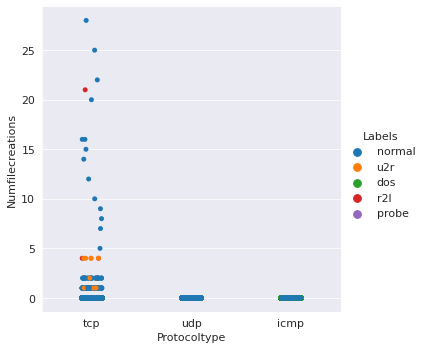

In [47]:
sns.catplot(x="Protocoltype", y="Numfilecreations", hue="Labels", data=df)

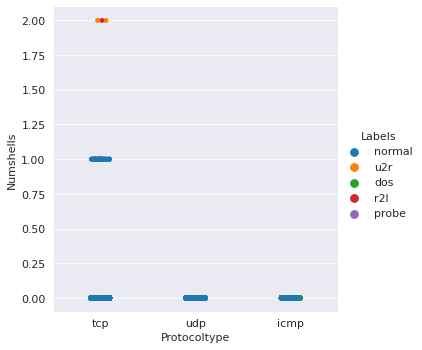

In [48]:
sns.catplot(x="Protocoltype", y="Numshells", hue="Labels", data=df)

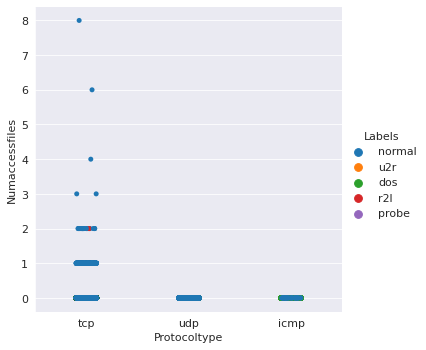

In [49]:
sns.catplot(x="Protocoltype", y="Numaccessfiles", hue="Labels", data=df)

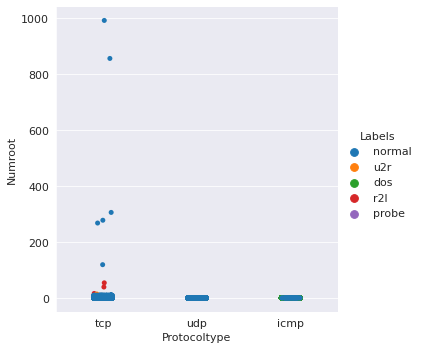

In [50]:
sns.catplot(x="Protocoltype", y="Numroot", hue="Labels", data=df)

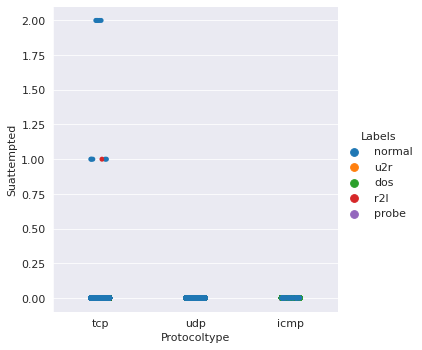

In [51]:
sns.catplot(x="Protocoltype", y="Suattempted", hue="Labels", data=df)

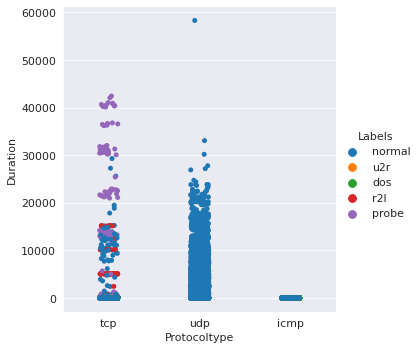

In [52]:
sns.catplot(x="Protocoltype", y="Duration", hue="Labels", data=df)

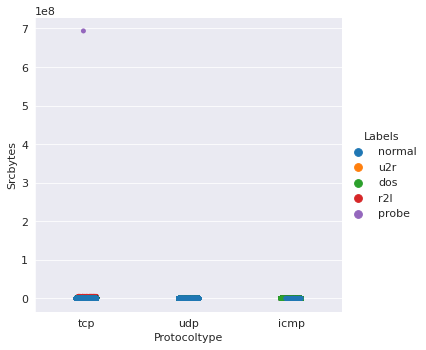

In [53]:
sns.catplot(x="Protocoltype", y="Srcbytes", hue="Labels", data=df)

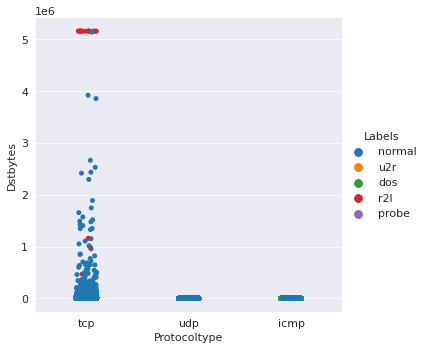

In [54]:
sns.catplot(x="Protocoltype", y="Dstbytes", hue="Labels", data=df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

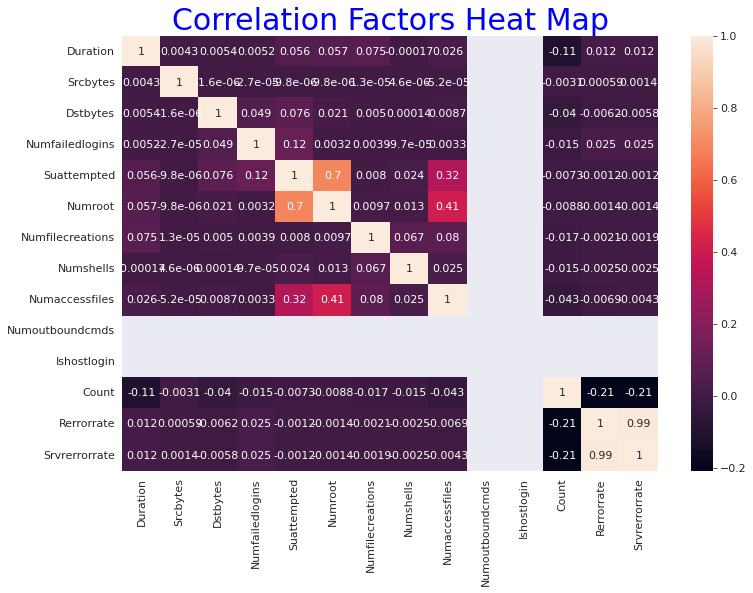

In [55]:
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='blue', size='30')

Ok apart from procotol, last connection to same host and duration there is no another evident preliminary conclusion that we might draw between events and the target, let's have later on a featrue importance regarding the target. Next we'll drop constant features and quasi constant features

# 3. Discover if data possess any structure

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Duration          494020 non-null  int64  
 1   Protocoltype      494020 non-null  object 
 2   Srcbytes          494020 non-null  int64  
 3   Dstbytes          494020 non-null  int64  
 4   Numfailedlogins   494020 non-null  int64  
 5   Suattempted       494020 non-null  int64  
 6   Numroot           494020 non-null  int64  
 7   Numfilecreations  494020 non-null  int64  
 8   Numshells         494020 non-null  int64  
 9   Numaccessfiles    494020 non-null  int64  
 10  Numoutboundcmds   494020 non-null  int64  
 11  Ishostlogin       494020 non-null  int64  
 12  Count             494020 non-null  int64  
 13  Rerrorrate        494020 non-null  float64
 14  Srvrerrorrate     494020 non-null  float64
 15  Labels            494020 non-null  object 
dtypes: float64(2), int64

In [57]:
df['Labels'].value_counts()

dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: Labels, dtype: int64

In [58]:
df['Protocoltype'].value_counts()

icmp    283602
tcp     190064
udp      20354
Name: Protocoltype, dtype: int64

In [59]:
df.describe()

,Duration,Srcbytes,Dstbytes,Numfailedlogins,Suattempted,Numroot,Numfilecreations,Numshells,Numaccessfiles,Numoutboundcmds,Ishostlogin,Count,Rerrorrate,Srvrerrorrate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000152,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,332.286347,0.057434,0.057719
std,707.747185,9.882191e+05,3.304003e+04,0.015520,0.007793,2.012720,0.096416,0.011020,0.036482,0.0,0.0,213.147129,0.231624,0.232147
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,117.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,510.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,511.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,5.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,511.000000,1.000000,1.000000


In [60]:
#Select only numeric columns for the purpose
num_data = df.select_dtypes(include = ['float64', 'int64']).copy()
num_data.head()
print("\n-----\n")
num_data.shape    
print("\n-----\n")   
num_data.columns

,Duration,Srcbytes,Dstbytes,Numfailedlogins,Suattempted,Numroot,Numfilecreations,Numshells,Numaccessfiles,Numoutboundcmds,Ishostlogin,Count,Rerrorrate,Srvrerrorrate
0,0,239,486,0,0,0,0,0,0,0,0,8,0.0,0.0
1,0,235,1337,0,0,0,0,0,0,0,0,8,0.0,0.0
2,0,219,1337,0,0,0,0,0,0,0,0,6,0.0,0.0
3,0,217,2032,0,0,0,0,0,0,0,0,6,0.0,0.0
4,0,217,2032,0,0,0,0,0,0,0,0,6,0.0,0.0



-----



(494020, 14)


-----



Index(['Duration', 'Srcbytes', 'Dstbytes', 'Numfailedlogins', 'Suattempted',
       'Numroot', 'Numfilecreations', 'Numshells', 'Numaccessfiles',
       'Numoutboundcmds', 'Ishostlogin', 'Count', 'Rerrorrate',
       'Srvrerrorrate'],
      dtype='object')

In [61]:
#Select only numeric columns for the purpose
col_data = df.select_dtypes(include = ['object']).copy()
col_data.head()
print("\n-----\n")
col_data.shape    
print("\n-----\n")   
col_data.columns

,Protocoltype,Labels
0,tcp,normal
1,tcp,normal
2,tcp,normal
3,tcp,normal
4,tcp,normal



-----



(494020, 2)


-----



Index(['Protocoltype', 'Labels'], dtype='object')

In [62]:
# Which columns are numeric and which not
num_cols = ['Duration','Srcbytes','Dstbytes','Numfailedlogins','Suattempted',
            'Numroot','Numfilecreations','Numshells','Numaccessfiles',
            'Numoutboundcmds','Ishostlogin','Count','Rerrorrate','Srvrerrorrate']
cat_cols = ['Protocoltype', 'Labels']

In [63]:
# Create an instance of StandardScaler object
ss= StandardScaler()

In [64]:
# Use fit and transform method
nc = ss.fit_transform(num_data.loc[:,num_cols])

In [65]:
nc.shape 

(494020, 14)

In [66]:
#Transform numpy array back to pandas dataframe as we will be using pandas plotting functions

nc = pd.DataFrame(nc, columns = num_cols)
nc.head(2)

,Duration,Srcbytes,Dstbytes,Numfailedlogins,Suattempted,Numroot,Numfilecreations,Numshells,Numaccessfiles,Numoutboundcmds,Ishostlogin,Count,Rerrorrate,Srvrerrorrate
0,-0.067792,-0.002820,-0.011578,-0.009782,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632,0.0,0.0,-1.521422,-0.247961,-0.248632
1,-0.067792,-0.002824,0.014179,-0.009782,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632,0.0,0.0,-1.521422,-0.247961,-0.248632


In [67]:
# Add/overwrite few columns that are discrete
# These columns were not to be scaled

nc['Suattempted'] = df['Suattempted']
nc['Numaccessfiles'] = df['Numaccessfiles']
nc['Numoutboundcmds'] = df['Numoutboundcmds']
nc['Ishostlogin'] = df['Ishostlogin']
nc.shape

(494020, 14)

In [74]:
# Also create a dataframe from random data
# for comparison:

rng = np.random.default_rng()
nc_rand = pd.DataFrame(rng.normal(size = (5000,14)),
                       columns = num_cols    # Assign column names, just like that
                       )


In [75]:
# Add/overwrite these columns also
from random import choice
from random import randint

def random_exclude(*exclude):
  exclude = set(exclude)
  randInt = randint(0,8)
  return random_exclude(exclude) if randInt in exclude else randInt 

nc_rand['Suattempted'] = np.random.randint(3,   size= (5000,))   # [0,1,2]
nc_rand['Ishostlogin'] = np.random.randint(1, size= (5000,))   # [0.0]
nc_rand['Numoutboundcmds'] = np.random.randint(1,  size= (5000,))   # [0.0]
nc_rand['Numaccessfiles'] = np.random.randint(random_exclude(5,7),   size= (5000,))   # [0,1,2,3,4,6,8]


nc_rand.shape   


(5000, 14)

**Parallel** **coordinates** **plot**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

Text(0.5, 1.0, 'Parallel chart with random data')

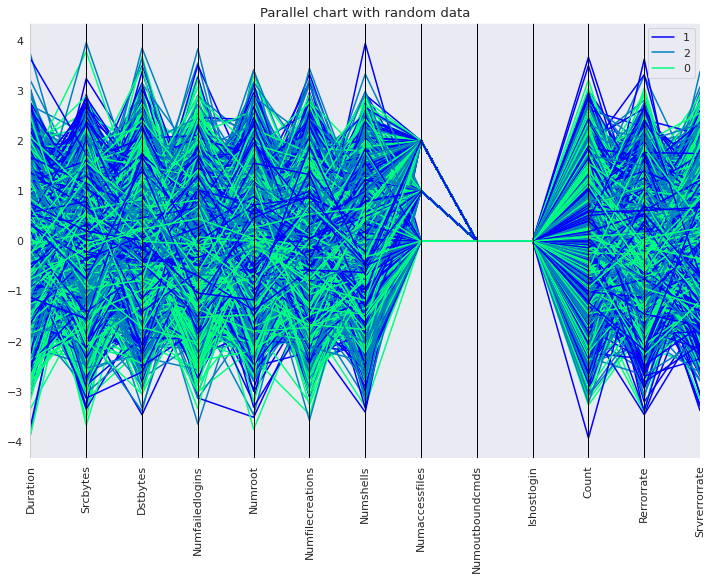

In [76]:
# Parallel coordinates with random data

fig1 = plt.figure()
pd.plotting.parallel_coordinates(nc_rand,
                                 'Suattempted',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with random data")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

Text(0.5, 1.0, 'Parallel chart with attack data')

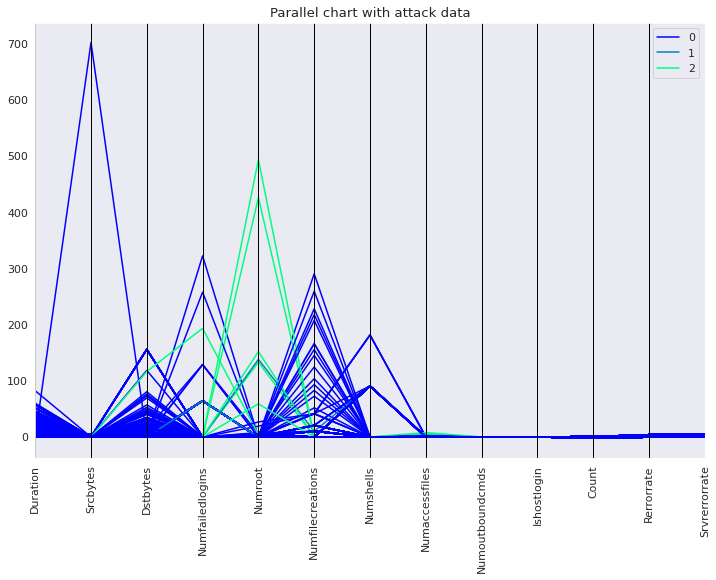

In [77]:
# Parallel coordinates with 'ad' data
fig2 = plt.figure()
ax = pd.plotting.parallel_coordinates(nc,
                                 'Suattempted',
                                  colormap= plt.cm.winter
                                  )

plt.xticks(rotation=90)
plt.title("Parallel chart with attack data")



Text(0.5, 1.0, 'Andrews plots with random data')

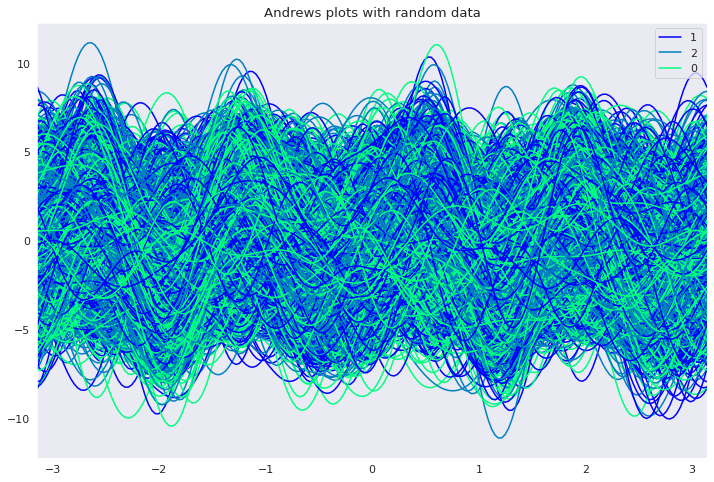

In [78]:
# 6.0 Andrews charts with random data
fig3 = plt.figure()
pd.plotting.andrews_curves(nc_rand,
                           'Suattempted',
                           colormap = 'winter')

plt.title("Andrews plots with random data")



In [ ]:
# 6.1 Andrews plots with ad data
fig4 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'Suattempted',
                            colormap = plt.cm.winter
                           )
plt.xticks(rotation=90)
plt.title("Andrews curve with attack data")


# 4.Data pipelining for data processing and modeling

In [ ]:
#Create pipe for both numerical as also categorical data
nc_pipe = Pipeline([ ('impute', SimpleImputer(strategy = 'median')), ('ss', StandardScaler()) ])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), ('ohe', OneHotEncoder())])

In [ ]:
# Test each pipe
nc_pipe.fit_transform(df[num_cols])
cat_pipe.fit_transform(df[cat_cols])

 # 5. Cross-validation

# 6. Hyperparameter tuning both using Grid Search and Randomized Search